# Unraveling MBTI Types from Online Posts


## Data Preprocessing

In [71]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/daneshvar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/daneshvar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daneshvar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import pandas as pd
df = pd.read_csv('mbti.csv')

In [36]:
def clean_posts(post):
    # Remove URLs
    post = re.sub(r'http\S+', '', post)
    # Remove special characters and numbers
    post = re.sub(r'[^A-Za-z\s]', '', post)
    # Tokenize
    tokens = word_tokenize(post)
    # Initialize Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords.words('english')]
    # Rejoin lemmatized tokens into a single string
    clean_post = ' '.join(lemmatized_tokens)
    return clean_post

In [8]:
df = df.head(8000)
df['cleaned_posts'] = df['posts'].apply(lambda x: '|||'.join([clean_posts(post) for post in x.split('|||')]))

In [9]:
df.to_csv('cleaned_dataset_5000.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('cleaned_dataset_5000.csv')

In [2]:
df.iloc[0]['posts']

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [3]:
df.iloc[0]['cleaned_posts']

'||||||enfp intj moment sportscenter top ten play prank|||lifechanging experience life|||repeat today|||may perc experience immerse|||last thing infj friend posted facebook committing suicide next day rest peace|||hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth||||||welcome stuff|||game set match|||prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative|||basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left|||thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim|||dear enfp favorite video game growing current favorite video game cool||||||appears late sad|||there someone everyone|||wait thought confidence good thing|||cherish time solitude bc revel within inner world whereas time id workin 

### Applying TF-IDF

When applying TF-IDF, there are several parameters to set:

1. ```max_features```: Consider the top ```max_features``` ordered by term frequency across the corpus.
2. ```ngram_range```: The lower and upper boundary of the range of n-values for different n-grams to be extracted. ```(1,2)``` means unigrams and bigrams. 
3. ```norm```: l1, l2, or no normialization. 
4. ...


We will be toggling ```max_features``` and see how it changes the outcome. 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=200) 
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_posts'])

In [5]:
from sklearn.model_selection import train_test_split

X = tfidf_features
y = df['type'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.393


An accuracy of 26% shows that there is a lot of room for imporvement. 
Potential causes:
1. Imbalanced dataset (One type is more rare than other ones): Bar plots to compare diversity. If a type is a minority, oversample it, to help fit a better model.
2. Look into better metrics than pure accuracy
3. Adjust ```ngram_range``` to consider bigrams too.
4. ...

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N-gram: Unigram | Max features: 25 | Accuracy: 0.22
N-gram: Unigram | Max features: 50 | Accuracy: 0.22
N-gram: Unigram | Max features: 100 | Accuracy: 0.377
N-gram: Unigram | Max features: 200 | Accuracy: 0.384
N-gram: Unigram | Max features: 500 | Accuracy: 0.44
N-gram: Unigram | Max features: 1000 | Accuracy: 0.412
N-gram: Unigram | Max features: 2000 | Accuracy: 0.377
N-gram: Unigram | Max features: 4000 | Accuracy: 0.345
N-gram: Bigram | Max features: 25 | Accuracy: 0.22
N-gram: Bigram | Max features: 50 | Accuracy: 0.22
N-gram: Bigram | Max features: 100 | Accuracy: 0.377
N-gram: Bigram | Max features: 200 | Accuracy: 0.383
N-gram: Bigram | Max features: 500 | Accuracy: 0.441
N-gram: Bigram | Max features: 1000 | Accuracy: 0.416
N-gram: Bigram | Max features: 2000 | Accuracy: 0.387
N-gram: Bigram | Max features: 4000 | Accuracy: 0.36
N-gram: Trigram | Max features: 25 | Accuracy: 0.22
N-gram: Trigram | Max features: 50 | Accuracy: 0.22
N-gram: Trigram | Max features: 100 | Accura

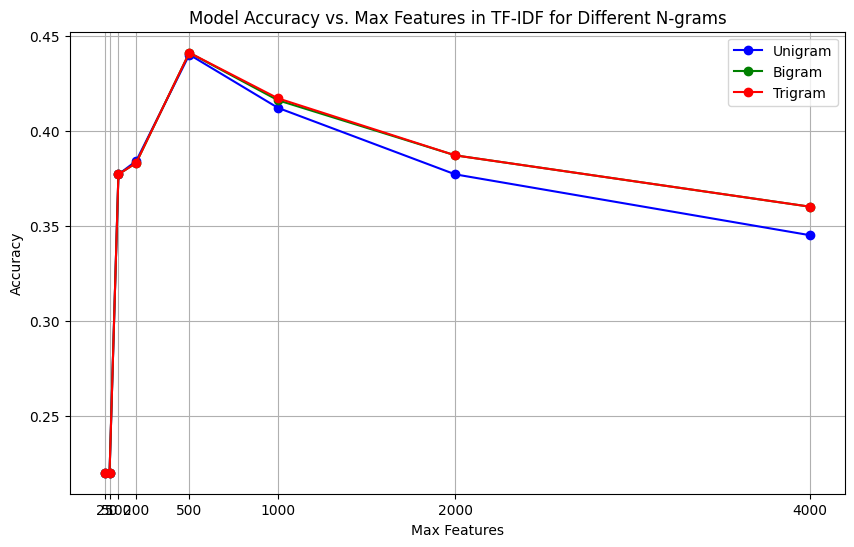

In [10]:
# Prepare different configurations
max_features_values = [25, 50, 100, 200, 500, 1000, 2000, 4000]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]
ngram_names = ["Unigram", "Bigram", "Trigram"]
colors = ['b', 'g', 'r']  # Different colors for different n-gram ranges

# Initialize a dictionary to store accuracy scores for each n-gram configuration
accuracy_scores = {ngram_name: [] for ngram_name in ngram_names}

for ngram_range, ngram_name, color in zip(ngram_ranges, ngram_names, colors):
    for max_features in max_features_values:
        # Vectorize text data with current max_features and n-gram range
        tfidf_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
        tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_posts'])
        
        # Split data into training and testing sets
        X = tfidf_features
        y = df['type']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1235)
        
        # Train Naive Bayes model and predict
        model = MultinomialNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate and store accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[ngram_name].append(accuracy)
        print(f"N-gram: {ngram_name} | Max features: {max_features} | Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
for ngram_name, color in zip(ngram_names, colors):
    plt.plot(max_features_values, accuracy_scores[ngram_name], marker='o', linestyle='-', color=color, label=ngram_name)

plt.title('Model Accuracy vs. Max Features in TF-IDF for Different N-grams')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(max_features_values)
plt.show()

In [13]:
pip install imblearn

SyntaxError: invalid syntax (900241324.py, line 1)

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N-gram: Unigram | Max features: 25 | Accuracy: 0.112
N-gram: Unigram | Max features: 50 | Accuracy: 0.125
N-gram: Unigram | Max features: 100 | Accuracy: 0.383
N-gram: Unigram | Max features: 200 | Accuracy: 0.439
N-gram: Unigram | Max features: 500 | Accuracy: 0.594
N-gram: Unigram | Max features: 1000 | Accuracy: 0.572
N-gram: Unigram | Max features: 2000 | Accuracy: 0.535
N-gram: Unigram | Max features: 4000 | Accuracy: 0.515
N-gram: Bigram | Max features: 25 | Accuracy: 0.112
N-gram: Bigram | Max features: 50 | Accuracy: 0.125
N-gram: Bigram | Max features: 100 | Accuracy: 0.383
N-gram: Bigram | Max features: 200 | Accuracy: 0.44
N-gram: Bigram | Max features: 500 | Accuracy: 0.596
N-gram: Bigram | Max features: 1000 | Accuracy: 0.561
N-gram: Bigram | Max features: 2000 | Accuracy: 0.541
N-gram: Bigram | Max features: 4000 | Accuracy: 0.528
N-gram: Trigram | Max features: 25 | Accuracy: 0.112
N-gram: Trigram | Max features: 50 | Accuracy: 0.125
N-gram: Trigram | Max features: 100 |

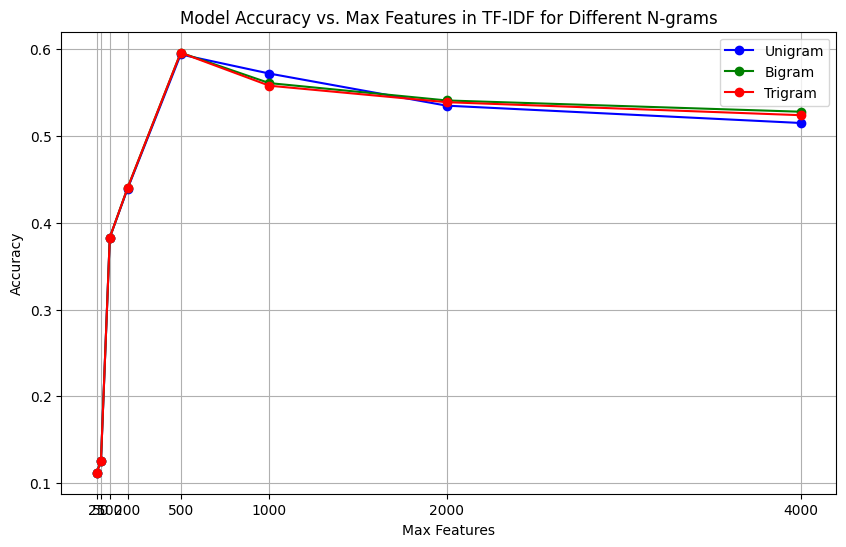

In [21]:
# Prepare different configurations
max_features_values = [25, 50, 100, 200, 500, 1000, 2000, 4000]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]
ngram_names = ["Unigram", "Bigram", "Trigram"]
colors = ['b', 'g', 'r']  # Different colors for different n-gram ranges

# Initialize a dictionary to store accuracy scores for each n-gram configuration
accuracy_scores = {ngram_name: [] for ngram_name in ngram_names}

for ngram_range, ngram_name, color in zip(ngram_ranges, ngram_names, colors):
    for max_features in max_features_values:
        # Vectorize text data with current max_features and n-gram range
        tfidf_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
        tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_posts'])
        
        # Split data into training and testing sets
        X = tfidf_features
        y = df['type']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1235)

        smote = SMOTE(random_state=43)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        
        # Train Naive Bayes model and predict
        model = MultinomialNB()
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        
        # Calculate and store accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[ngram_name].append(accuracy)
        print(f"N-gram: {ngram_name} | Max features: {max_features} | Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
for ngram_name, color in zip(ngram_names, colors):
    plt.plot(max_features_values, accuracy_scores[ngram_name], marker='o', linestyle='-', color=color, label=ngram_name)

plt.title('Model Accuracy vs. Max Features in TF-IDF for Different N-grams')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(max_features_values)
plt.show()